# Постановка задачи кластеризации

Пусть $X$ — множество объектов, $Y$ — множество номеров (имён, меток) кластеров. 
- Задана функция расстояния между объектами $ \rho(x,x')$. 
- Имеется конечная обучающая выборка объектов $X^m = \{ x_1, \dots, x_m \} \subset X$. 
- Требуется разбить выборку на непересекающиеся подмножества, называемые кластерами, так, чтобы каждый кластер состоял из объектов, близких по метрике $\rho$, а объекты разных кластеров существенно отличались. При этом каждому объекту $x_i\in X^m$ приписывается номер кластера $y_i$.

Алгоритм кластеризации — это функция $a:\, X\to Y$, которая любому объекту $x\in X$ ставит в соответствие номер кластера $y\in Y$. Множество $Y$ в некоторых случаях известно заранее, однако чаще ставится задача определить оптимальное число кластеров, с точки зрения того или иного критерия качества кластеризации.


Кластеризация (обучение без учителя) отличается от классификации (обучения с учителем) тем, что метки исходных объектов $y_i$ изначально не заданы, и даже может быть неизвестно само множество $Y$.

Выше постановка чёткой кластеризации (одному объекту сопоставляется один кластер). Выделяют ещё нечеткую кластеризацию, когда одному объекту сопоставляется несколько кластеров, с некоторыми весами. С ней вы встретитесь при работе над тематическим моделированием.

## Ничего идеального нет

Введем несколько определений.

*Определение 1:*
> Алгоритм кластеризации $a$ является **масштабно-инвариантным** (англ. scale-invariant), если для любой функции расстояния $\rho$ и любой константы $\alpha>0$ результаты кластеризации с использованием расстояний $ρ$ и $α⋅ρ$ совпадают.

*Определение 2:*
> **Полнота** (англ. Richness). Множество результатов кластеризации алгоритма $a$ в зависимости от изменения функции расстояния $ρ$ должно совпадать со множеством всех возможных разбиений множества объектов $X$.

*Определение 3:*
> Функция расстояния $ρ′$ является **допустимым преобразованием** функции расстояния $ρ$, если
  1. $\rho′(x_i,x_j)\leq\rho(x_i,x_j)$, если $x_i$ и $x_j$ лежат в одном кластере; (сужает)
  2. $\rho′(x_i,x_j)\geq \rho(x_i,x_j)$, если $x_i$ и $x_j$ лежат в разных кластерах. (растягивает)

*Определение 4:*
> Алгоритм кластеризации является **согласованным** (англ. consistent), если результат кластеризации не изменяется после допустимого преобразования функции расстояния.

---
**Теорема Клейнберга о невозможности:**
> Для множества объектов, состоящего из двух и более элементов, не существует алгоритма кластеризации, который был бы одновременно *масштабно-инвариантным*, *согласованным* и *полным*.



Доказательство: https://www.cs.cornell.edu/home/kleinber/nips15.pdf

Решение задачи кластеризации принципиально неоднозначно, и тому есть несколько причин:

- Не существует однозначно **наилучшего критерия качества** кластеризации. Известен целый ряд эвристических критериев, а также ряд алгоритмов, не имеющих чётко выраженного критерия, но осуществляющих достаточно разумную кластеризацию «по построению». Все они могут давать разные результаты.
- **Число кластеров**, как правило, неизвестно заранее и устанавливается в соответствии с некоторым субъективным критерием.
- Результат кластеризации существенно зависит от **метрики**, выбор которой, как правило, также субъективен и определяется экспертом.

# Генерация датасета

Два варианта:
- sklearn.datasets.make_blobs -- сгенерировать просто точки (сужает количество вариантов используемых метрик качества, но близко к реальной постановке).<details>
<summary>на самом деле нет</summary>
make_blobs тоже генерирует информацию о принадлежности к кластеру, поищите (thx to GUN1A)
</details>
- sklearn.datasets.make_classification -- сгенерировать точки и метки для них (метки при обучении не используются, только при оценке качества).



In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data, data_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=110)

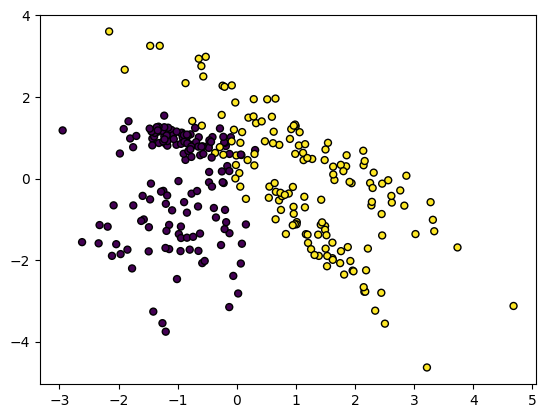

In [2]:
# как видит классификатор
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")
plt.show()

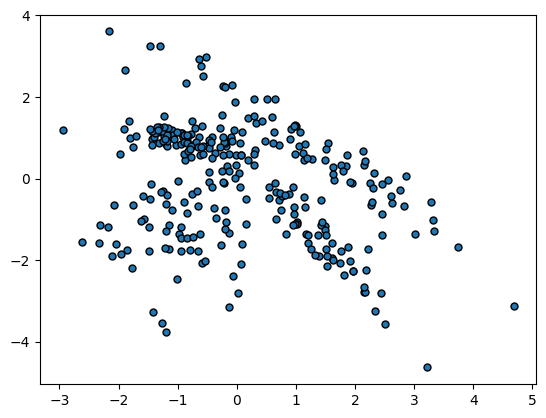

In [3]:
# как видит кластеризатор
plt.scatter(data[:, 0], data[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

# Алгоритмы кластеризации

## K-means

[Описание метода](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85)

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

Шаги алгоритма:
```
1. Выбрать случайно координаты центроидов для каждого кластера.
2. Посчитать расстояния от каждого объекта до центроидов.
3. Посчитать центр масс (центроид) каждого кластера.
4. Проверить условие остановки, вернуться к шагу 2.
```

От начального выбора центроидов зависит качество и скорость сходимости. Существуют модификации, которые улучшают случайный выбор ([K-means++](https://ru.wikipedia.org/wiki/K-means%2B%2B), например)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, n_init='auto').fit(data)

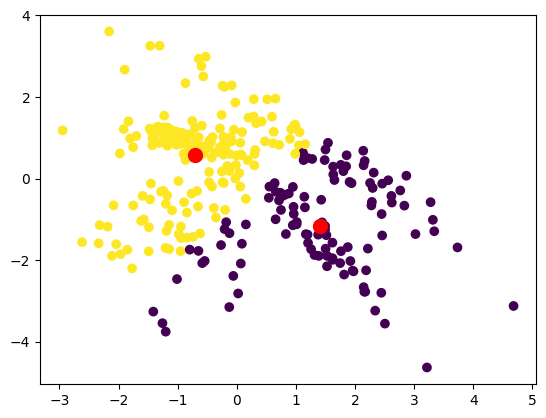

In [5]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

# Оценка качества кластеризации

Меры оценки кластеризации бывают двух видов:
- Внутренние -- меры отображают качество кластеризации только по информации в данных
- Внешние -- меры основаны на сравнении результата кластеризации с априори известным разделением на классы

[Большой список мер оценки](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)

[Поменьше, но с картинками](https://habr.com/ru/companies/yandex/articles/500742/)

Самые частые:
- Внутренние: силуэт
- Внешние: rand score

In [6]:
from sklearn.metrics.cluster import rand_score

rand_score(kmeans.labels_, data_y)

0.6305239687848383

In [7]:
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

0.43210036054559814

# Подбор оптимального количества кластеров

Количество кластеров -- обычный гиперпараметр.
Т.о. для подбора оптимального гиперпараметра нужно определиться с оценкой качества алгоритма и списком значений для гиперпараметра. 

## Метод локтя
Существует метод локтя, который использует такую оценку как [ компактность](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.9A.D0.BE.D0.BC.D0.BF.D0.B0.D0.BA.D1.82.D0.BD.D0.BE.D1.81.D1.82.D1.8C_.D0.BA.D0.BB.D0.B0.D1.81.D1.82.D0.B5.D1.80.D0.BE.D0.B2_.28.D0.B0.D0.BD.D0.B3.D0.BB._Cluster_Cohesion.29) (kmeans.inertia_).



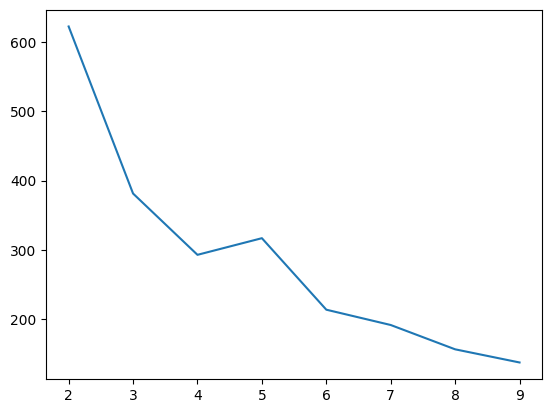

In [8]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

## Метод силуэта

Использует понятно какую [метрику](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.A1.D0.B8.D0.BB.D1.83.D1.8D.D1.82_.28.D0.B0.D0.BD.D0.B3.D0.BB._Silhouette.29)

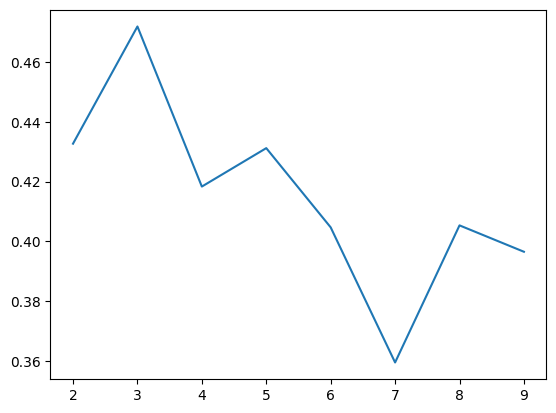

In [9]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data, KMeans(i, n_init='auto').fit(data).labels_))

plt.plot(range(2,10), ss)

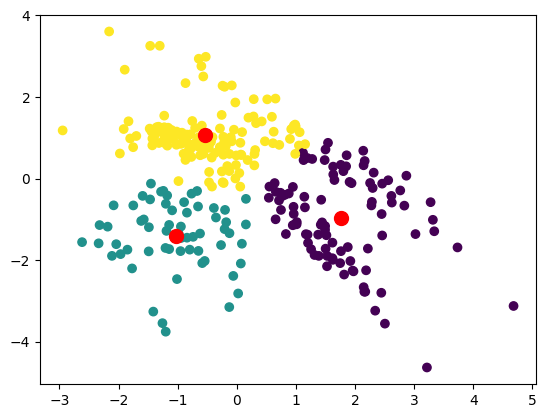

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(3, n_init='auto').fit(data)

plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

# Алгоритмы кластеризации

## Affinity propagation

[Хорошее объяснение](https://habr.com/ru/articles/321216/)

Affinity Propagation (AP) - это алгоритм кластеризации, основанный на передаче сообщений между точками данных. В отличие от других алгоритмов кластеризации, таких как K-means, AP не требует заранее определенного числа кластеров. Для этой цели двумя важными параметрами являются "preference", которые контролируют количество экземпляров и "damping factor", который снижает ответственность и доступность сообщений, чтобы избежать числовых колебаний при обновлении этих сообщений. Подбираются через поиск по сетке.

---

Шаги работы алгоритма Affinity Propagation:
1. Инициализация: Создайте матрицу сходства S, где каждый элемент s(i, j) представляет сходство между точками данных i и j. Обычно сходство определяется как отрицательное квадратное евклидово расстояние. Затем инициализируйте две другие матрицы: матрицу ответственности R и матрицу доступности A, заполнив их нулями.

2. Обновление ответственности: Обновите матрицу ответственности R, используя текущие значения матрицы доступности A и матрицы сходства S. Ответственность r(i, k) отражает насколько подходящим является объект k в качестве экземпляра для объекта i.

3. Обновление доступности: Обновите матрицу доступности A, используя текущие значения матрицы ответственности R. Доступность a(i, k) отражает насколько подходящим является объект i для выбора объекта k в качестве экземпляра.

4. Сходимость: Повторяйте шаги 2 и 3 до тех пор, пока не будет достигнут критерий сходимости. Обычно это означает, что значения матриц R и A стабилизируются после определенного числа итераций.


Выделение кластеров: После сходимости определите кластеры, выбрав для каждого объекта i экземпляр k, который максимизирует сумму ответственности r(i, k) и доступности a(i, k).
В результате работы алгоритма Affinity Propagation получаем кластеры с автоматически определенным числом кластеров и экземплярами, представляющими каждый кластер.


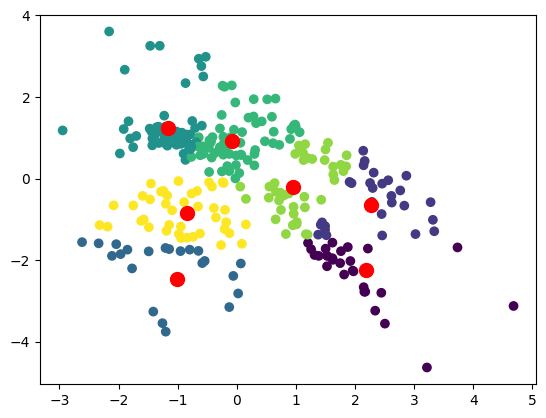

In [11]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(preference=-42).fit(data)

plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

## DB-SCAN


- Находим точки в $\epsilon$  окрестности каждой точки и выделяем основные точки с более чем minPts соседями.

- Находим связные компоненты основных точек на графе соседей, игнорируя все неосновные точки.

- Назначаем каждую неосновную ближайшему кластеру, если кластер является $\epsilon$ -соседним, в противном случае считаем точку шумом.

[-1  0]


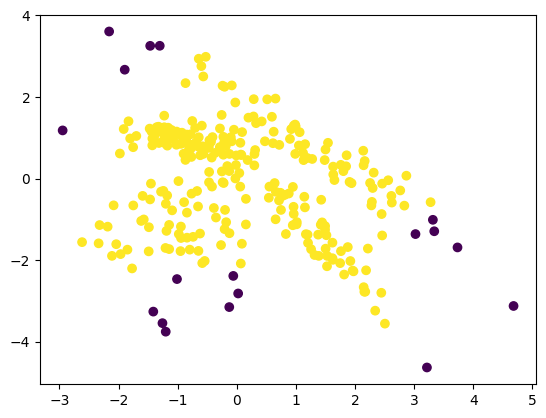

In [12]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN().fit(data)

print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

[-1  0  1  2  3  4  5]


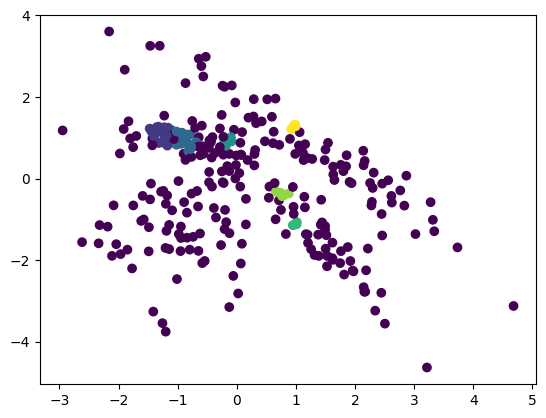

In [13]:
dbscan = DBSCAN(eps=0.1, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

In [14]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(data)
distances, indices = nbrs.kneighbors(data)
distances

array([[0.        , 0.14075262, 0.36792915, 0.44996652],
       [0.        , 0.03239929, 0.03600522, 0.07527797],
       [0.        , 0.11009673, 0.19382091, 0.21479119],
       ...,
       [0.        , 0.28260111, 0.32034932, 0.33287071],
       [0.        , 0.03065035, 0.05157891, 0.06290576],
       [0.        , 0.05460523, 0.06462845, 0.07566198]])

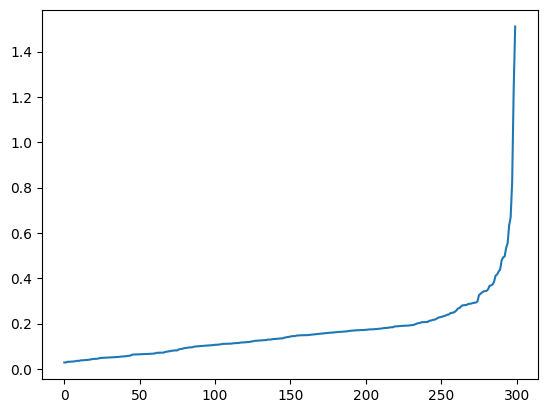

In [15]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5]


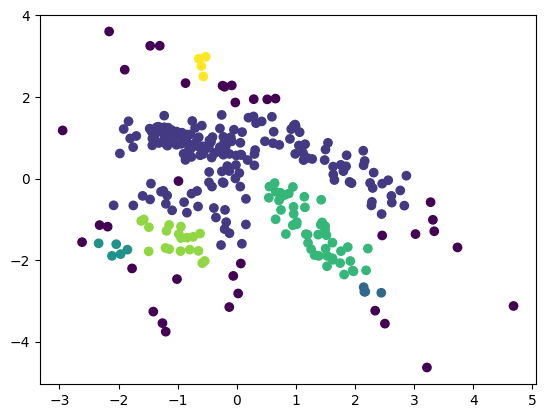

In [16]:
dbscan = DBSCAN(eps=0.35, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

# Gaussian Mixtures, EM

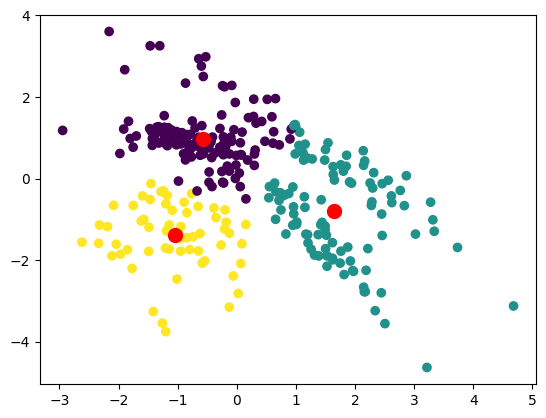

In [17]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3).fit(data)

gm.predict(data)

plt.scatter(data[:,0], data[:,1], c=gm.predict(data))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

## Иерархическая кластеризация

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering


In [18]:
from scipy.cluster import hierarchy

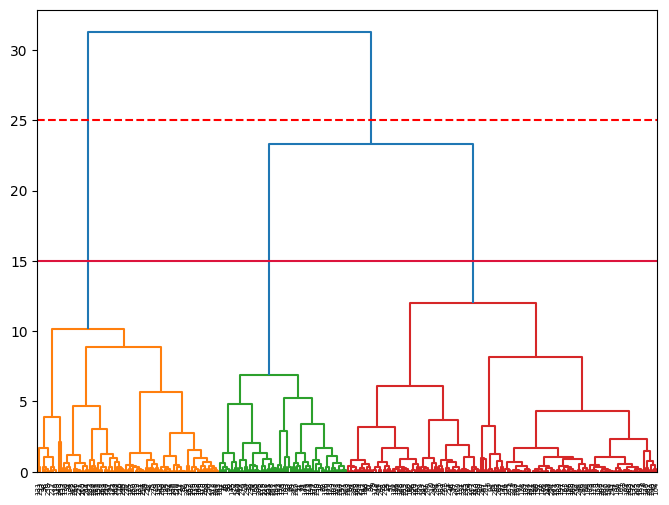

In [19]:
clusters = hierarchy.linkage(data, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson'); 

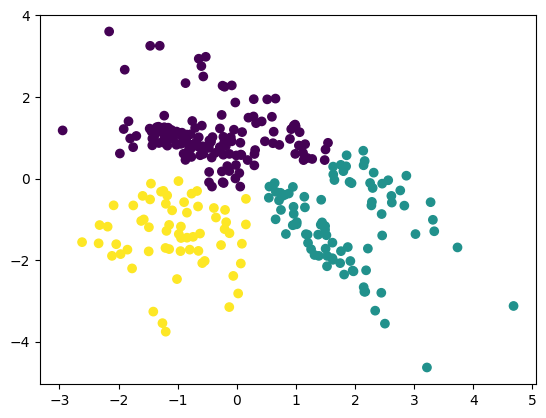

In [20]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data)
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

## Карты Кохонена


Крутой разбор: https://habr.com/ru/articles/338868/



In [21]:
# simpSOM
# https://pypi.org/project/sklearn-som/
!pip install sklearn_som 

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [22]:
from sklearn_som.som import SOM

In [23]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data)

In [24]:
predictions = iris_som.predict(data)

In [25]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

# Задание

1. Сгенерировать 3 датасета (make_classification или make_blobs)
2. Провести визуализацию
3. Провести кластеризацию (все методы)
4. Для каждого метода подобрать оптимальные гипер-параметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

# Доп. задание:

Реализовать DB-Scan

$%внизу лишний пробел$
! [](https://wojakparadise.net/wojak/3038/img)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score, fowlkes_mallows_score 
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from sklearn_som.som import SOM

In [6]:
data1 = make_blobs(n_samples=200, n_features=2, centers=3, random_state=42)
data2 = make_blobs(n_samples=300, n_features=2, centers=5, random_state=42)
data3 = make_classification(n_samples=250, n_features=2, n_classes=2, n_redundant=0, random_state=42)

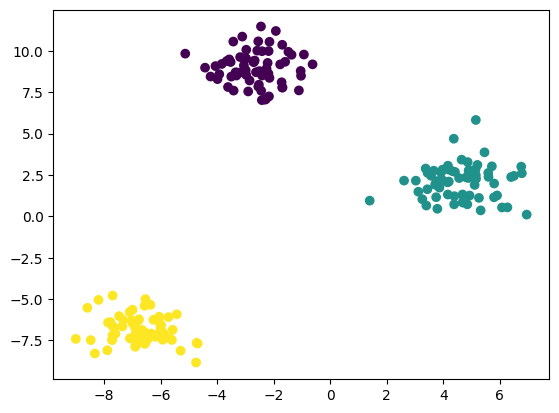

In [7]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=data1[1])

In [8]:
kmeans = KMeans(3, n_init='auto').fit(data1[0])

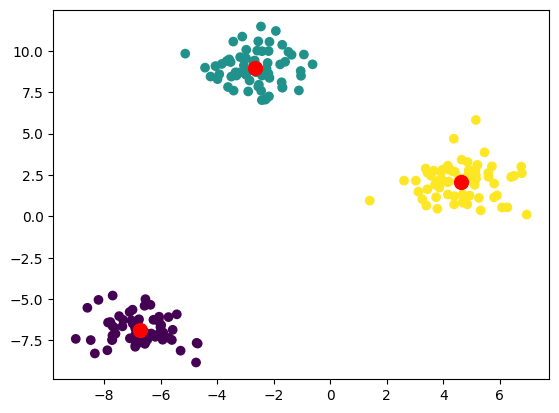

In [9]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [31]:
kmeans.inertia_

344.40465453464026

In [10]:
inertias = []
for i in range(2, 11):
    km = KMeans(i, n_init='auto').fit(data1[0])
    inertias.append(km.inertia_)

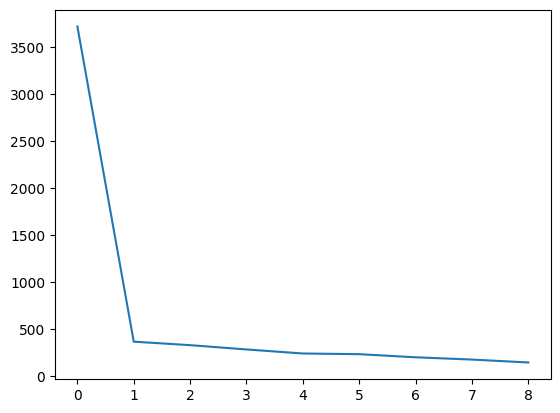

In [11]:
plt.plot(inertias)

In [12]:
print(silhouette_score(data1[0], kmeans.labels_))
print(calinski_harabasz_score(data1[0], kmeans.labels_))

0.8467003894636074
3453.183319092555


In [13]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data1[0], KMeans(i, n_init='auto').fit(data1[0]).labels_))

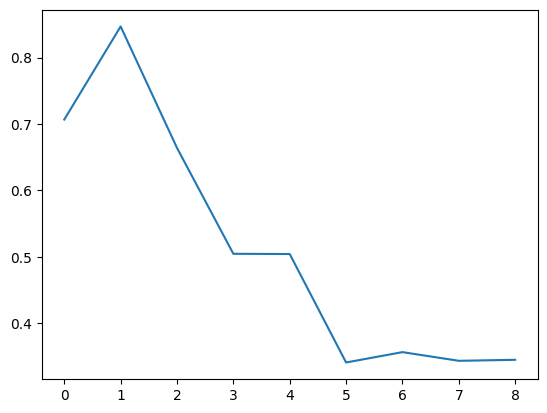

In [14]:
plt.plot(ss)

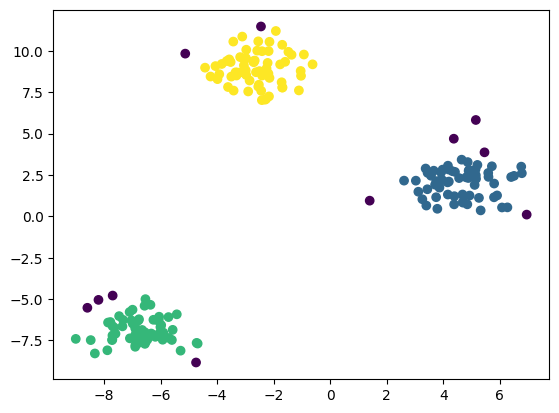

In [16]:
dbscan = DBSCAN(eps=0.8, min_samples=4).fit(data1[0])
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan.labels_)

In [19]:
ss = []
for i in range(3, 15):
    ss.append(silhouette_score(data1[0], DBSCAN(eps=0.8, min_samples=i).fit(data1[0]).labels_))

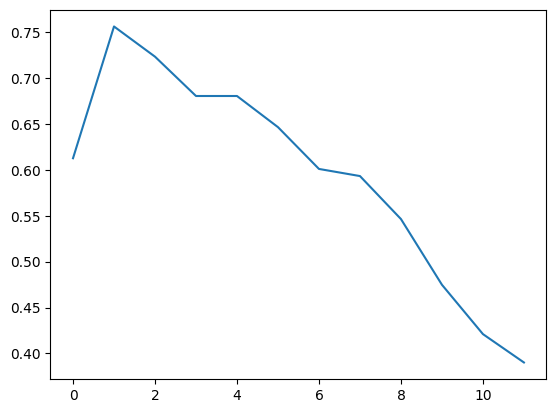

In [20]:
plt.plot(ss)

In [23]:
ss = []
i = 0.2
while i <= 1:
    ss.append(silhouette_score(data1[0], DBSCAN(eps=i, min_samples=4).fit(data1[0]).labels_))
    i += 0.05

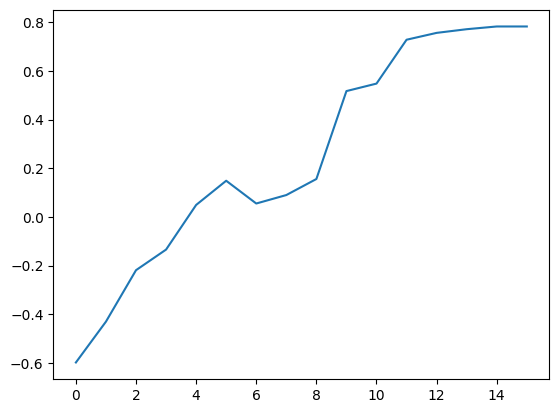

In [24]:
plt.plot(ss)

In [25]:
print(silhouette_score(data1[0], dbscan.labels_))
print(calinski_harabasz_score(data1[0], dbscan.labels_))

0.7562389996590693
723.6377035565281


In [26]:
ap = AffinityPropagation(preference=-65).fit(data1[0])

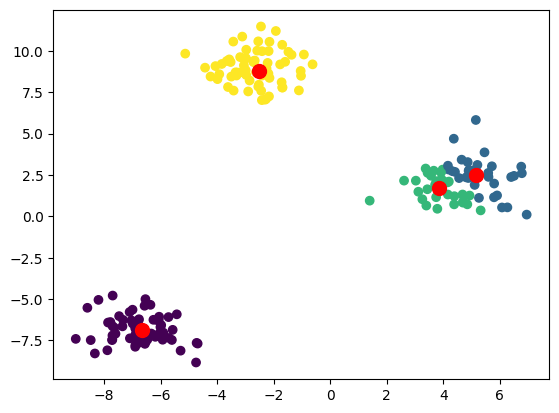

In [27]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=ap.labels_)
plt.scatter(ap.cluster_centers_[:,0], ap.cluster_centers_[:,1], s=100, c='red')

In [28]:
ss = []
for i in range(-65, -35):
    ss.append(silhouette_score(data1[0], AffinityPropagation(preference=i).fit(data1[0]).labels_))

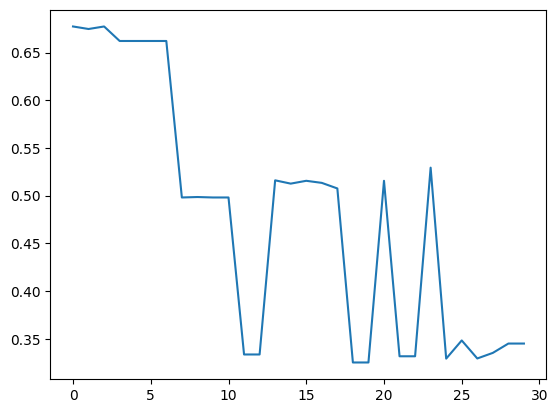

In [29]:
plt.plot(ss)

In [30]:
print(silhouette_score(data1[0], ap.labels_))
print(calinski_harabasz_score(data1[0], ap.labels_))

0.67737617089675
2661.6914462390628


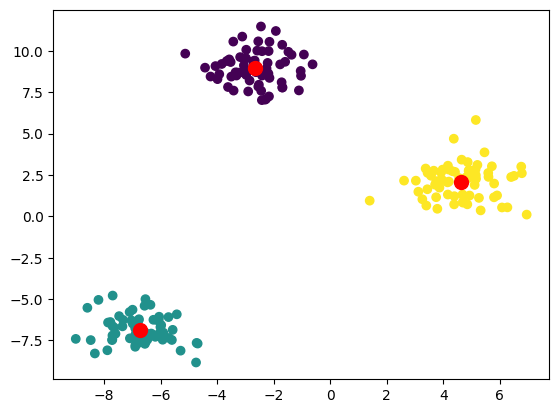

In [31]:
gm = GaussianMixture(n_components=3).fit(data1[0])
plt.scatter(data1[0][:,0], data1[0][:,1], c=gm.predict(data1[0]))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

In [32]:
print(silhouette_score(data1[0], gm.predict(data1[0])))
print(calinski_harabasz_score(data1[0], gm.predict(data1[0])))

0.8467003894636074
3453.183319092555


In [33]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data1[0], GaussianMixture(n_components=i).fit(data1[0]).predict(data1[0])))

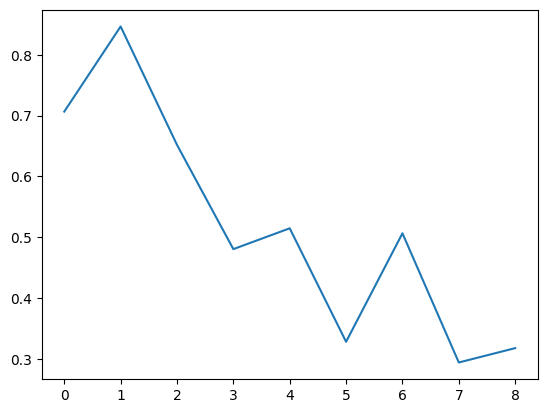

In [34]:
plt.plot(ss)

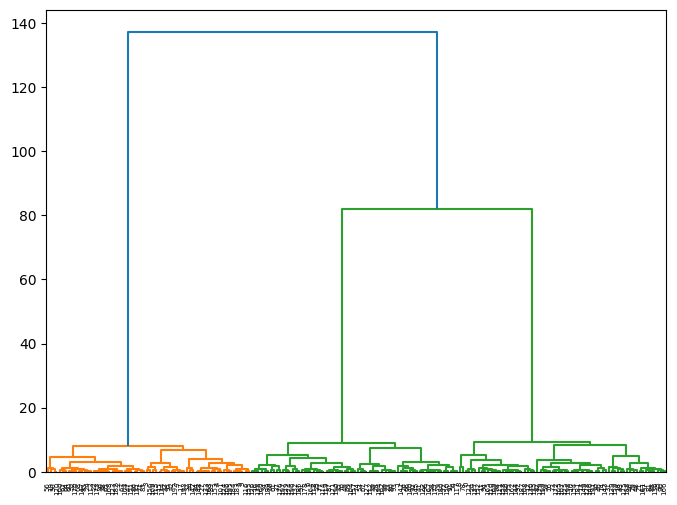

In [35]:
clusters = hierarchy.linkage(data1[0], method='ward')

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

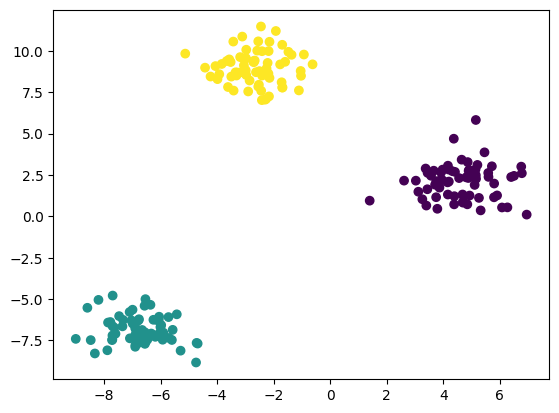

In [36]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data1[0])
plt.scatter(data1[0][:,0], data1[0][:,1], c=clustering.labels_)

In [37]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data1[0], AgglomerativeClustering(n_clusters=i, linkage='ward').fit(data1[0]).labels_))

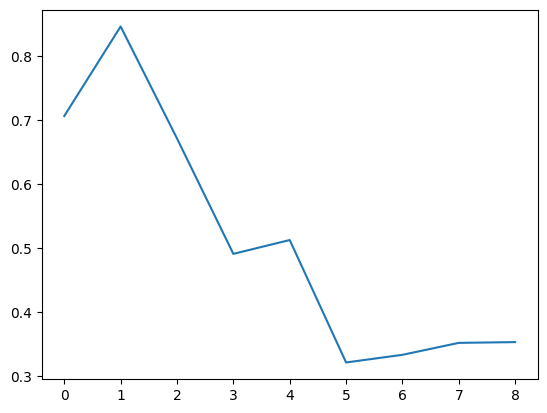

In [38]:
plt.plot(ss)

In [39]:
print(silhouette_score(data1[0], clustering.labels_))
print(calinski_harabasz_score(data1[0], clustering.labels_))

0.8467003894636074
3453.1833190925545


In [40]:
som = SOM(m=3, n=1, dim=2)
som.fit(data1[0])

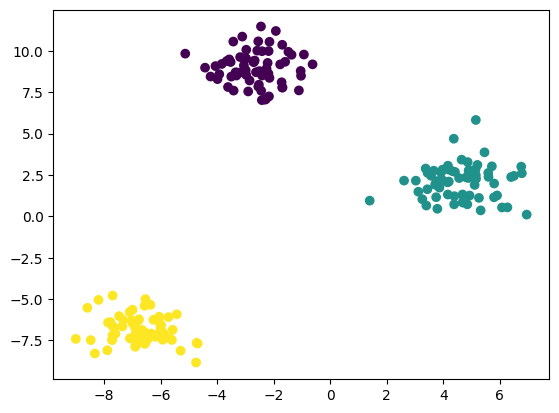

In [41]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=som.predict(data1[0]))

In [42]:
ss = []
for i in range(2, 11):
    som_ = SOM(m=i, n=1, dim=2)
    som_.fit(data1[0])
    ss.append(silhouette_score(data1[0], som_.predict(data1[0])))

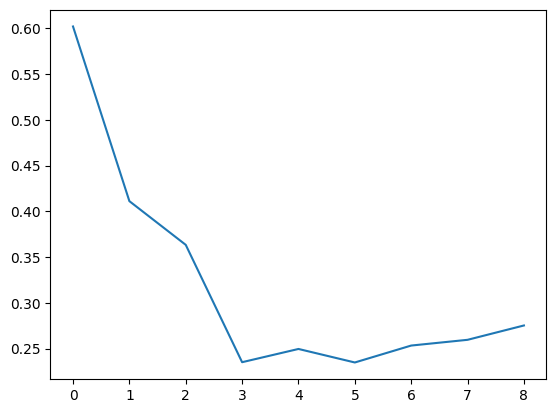

In [58]:
plt.plot(ss)

In [43]:
print(silhouette_score(data1[0], som.predict(data1[0])))
print(calinski_harabasz_score(data1[0], som.predict(data1[0])))

0.8467003894636074
3453.1833190925545


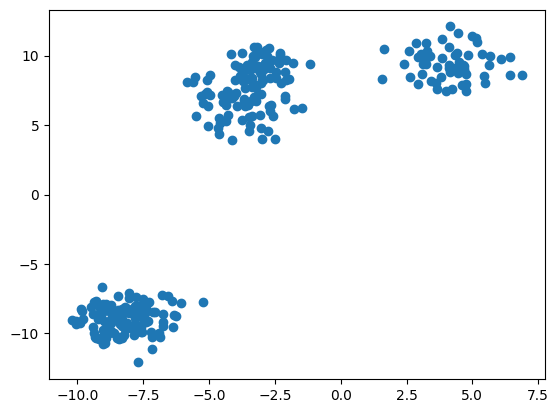

In [60]:
plt.scatter(data2[0][:,0], data2[0][:,1])

In [61]:
kmeans = KMeans(5, n_init='auto').fit(data2[0])

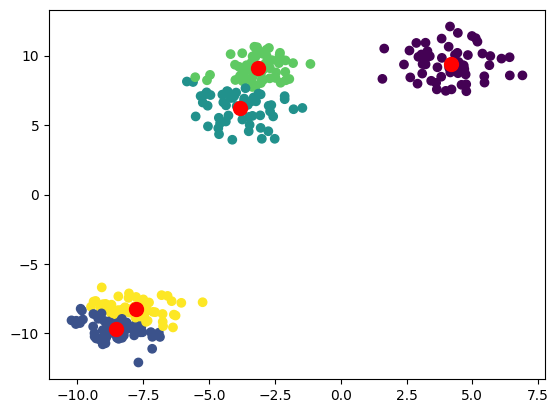

In [62]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [63]:
inertias = []
for i in range(2, 11):
    km = KMeans(i, n_init='auto').fit(data2[0])
    inertias.append(km.inertia_)

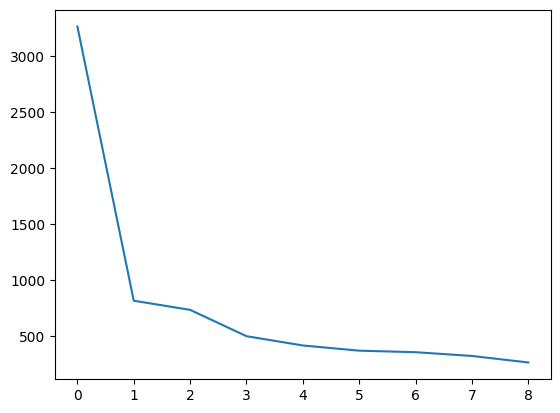

In [64]:
plt.plot(inertias)

In [65]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data2[0], KMeans(i, n_init='auto').fit(data2[0]).labels_))

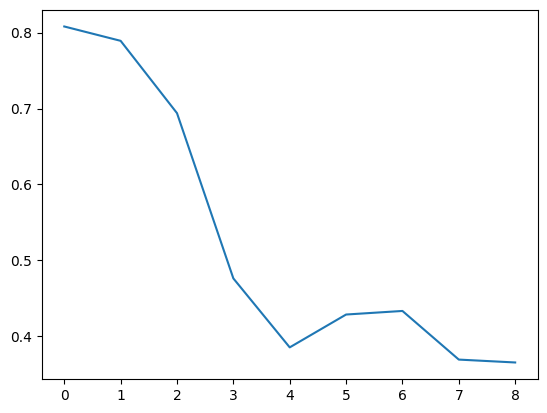

In [66]:
plt.plot(ss)

In [67]:
print(silhouette_score(data2[0], kmeans.labels_))
print(calinski_harabasz_score(data2[0], kmeans.labels_))

0.4762018760039906
4339.798888893999


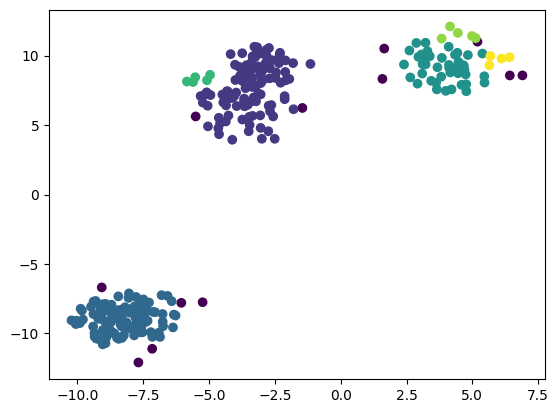

In [68]:
dbscan = DBSCAN(eps=0.8, min_samples=5).fit(data2[0])
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan.labels_)

In [69]:
ss = []
for i in range(5, 15):
    ss.append(silhouette_score(data2[0], DBSCAN(eps=0.8, min_samples=i).fit(data2[0]).labels_))

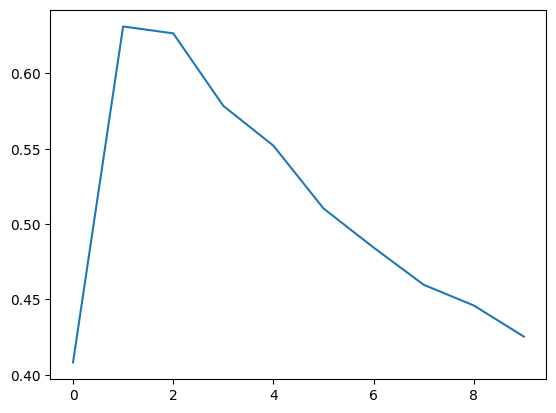

In [70]:
plt.plot(ss)

In [71]:
print(silhouette_score(data2[0], dbscan.labels_))
print(calinski_harabasz_score(data2[0], dbscan.labels_))

0.4082168987920557
652.4702105031959


In [72]:
ap = AffinityPropagation(preference=-62).fit(data2[0])

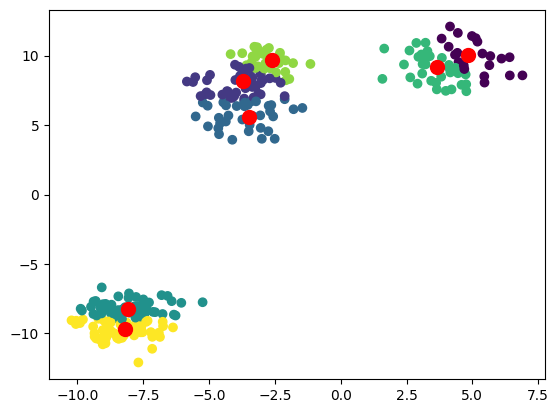

In [73]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=ap.labels_)
plt.scatter(ap.cluster_centers_[:,0], ap.cluster_centers_[:,1], s=100, c='red')

In [74]:
ss = []
for i in range(-65, -35):
    ss.append(silhouette_score(data2[0], AffinityPropagation(preference=i).fit(data2[0]).labels_))

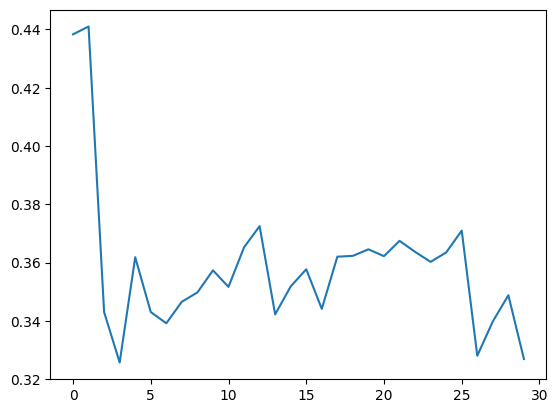

In [75]:
plt.plot(ss)

In [76]:
print(silhouette_score(data2[0], ap.labels_))
print(calinski_harabasz_score(data2[0], ap.labels_))

0.3257445750623806
3548.360509463293


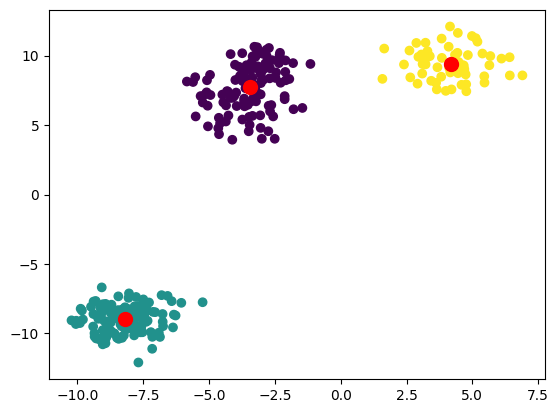

In [77]:
gm = GaussianMixture(n_components=3).fit(data2[0])
plt.scatter(data2[0][:,0], data2[0][:,1], c=gm.predict(data2[0]))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

In [78]:
print(silhouette_score(data2[0], gm.predict(data2[0])))
print(calinski_harabasz_score(data2[0], gm.predict(data2[0])))

0.7892013127374099
5025.178034658871


In [79]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data2[0], GaussianMixture(n_components=i).fit(data2[0]).predict(data2[0])))

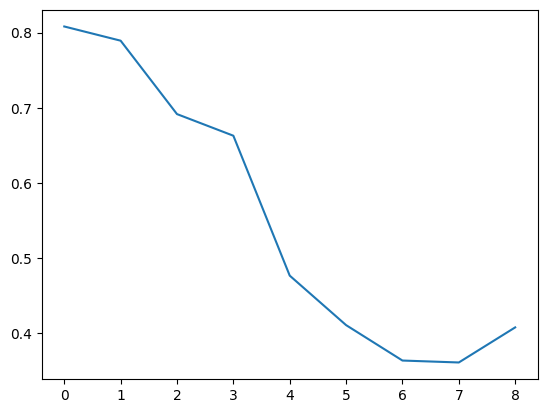

In [80]:
plt.plot(ss)

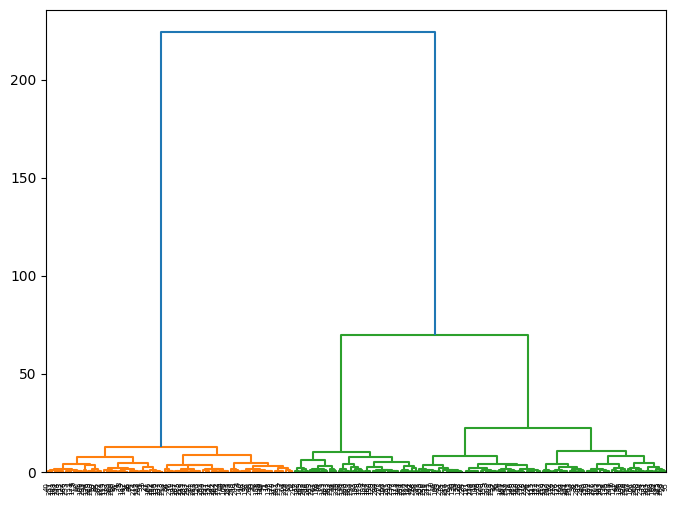

In [81]:
clusters = hierarchy.linkage(data2[0], method='ward')

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

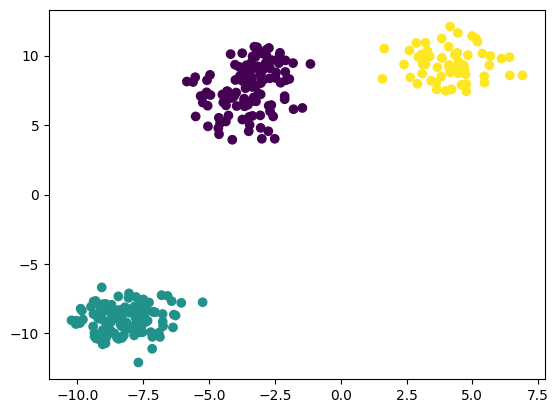

In [82]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data2[0])
plt.scatter(data2[0][:,0], data2[0][:,1], c=clustering.labels_)

In [83]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data2[0], AgglomerativeClustering(n_clusters=i, linkage='ward').fit(data2[0]).labels_))

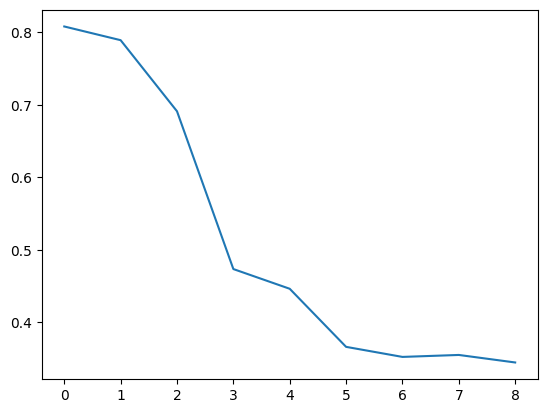

In [84]:
plt.plot(ss)

In [85]:
print(silhouette_score(data2[0], clustering.labels_))
print(calinski_harabasz_score(data2[0], clustering.labels_))

0.7892013127374099
5025.178034658871


In [86]:
som = SOM(m=3, n=1, dim=2)
som.fit(data2[0])

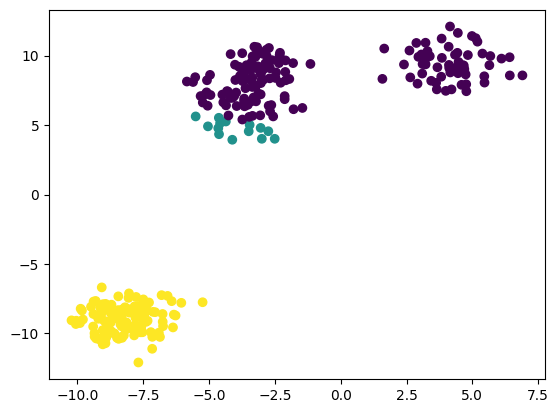

In [87]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=som.predict(data2[0]))

In [88]:
ss = []
for i in range(2, 11):
    som_ = SOM(m=i, n=1, dim=2)
    som_.fit(data2[0])
    ss.append(silhouette_score(data2[0], som_.predict(data2[0])))

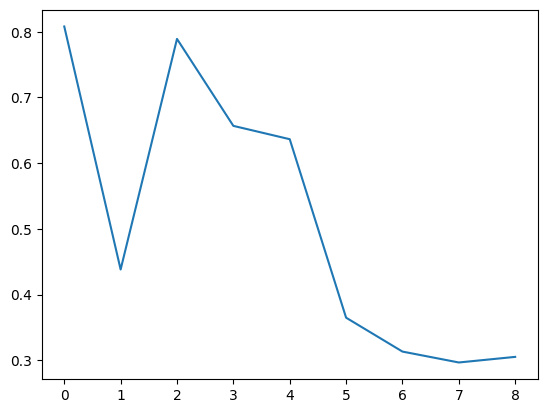

In [89]:
plt.plot(ss)

In [90]:
print(silhouette_score(data2[0], som.predict(data2[0])))
print(calinski_harabasz_score(data2[0], som.predict(data2[0])))

0.424131544192661
1292.981799684147


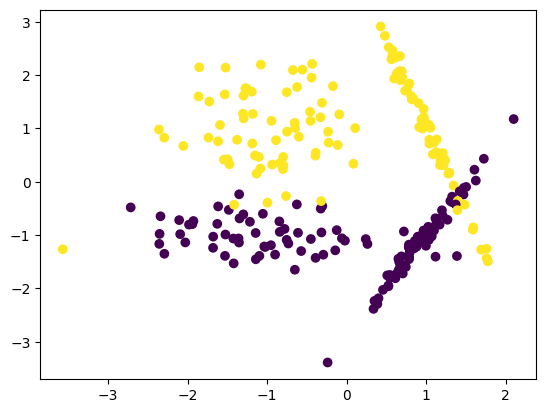

In [91]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=data3[1])

In [92]:
kmeans = KMeans(2, n_init='auto').fit(data3[0])

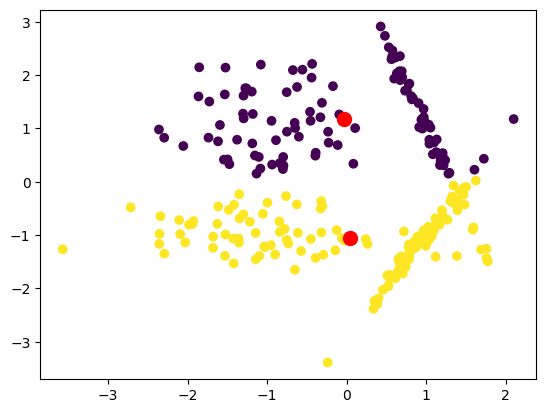

In [93]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [94]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data3[0], KMeans(i, n_init='auto').fit(data3[0]).labels_))

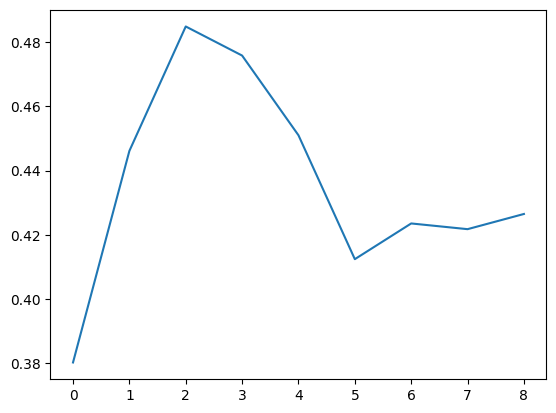

In [95]:
plt.plot(ss)

In [96]:
print(silhouette_score(data3[0], kmeans.labels_))
print(calinski_harabasz_score(data3[0], kmeans.labels_))
print(rand_score(kmeans.labels_, data3[1]))
print(fowlkes_mallows_score(kmeans.labels_, data3[1]))

0.4033830304966909
181.56574928586528
0.8658313253012048
0.865824828328525


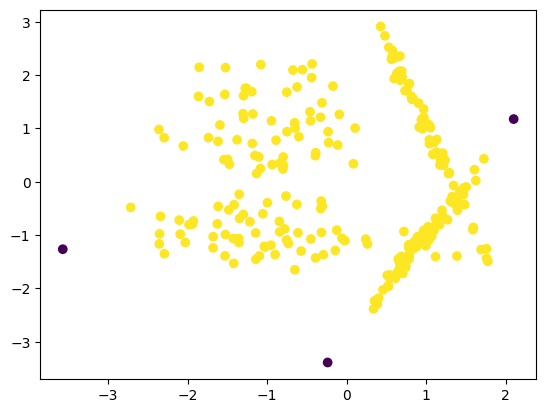

In [97]:
dbscan = DBSCAN(eps=0.8, min_samples=7).fit(data3[0])
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan.labels_)

In [98]:
ss = []
for i in range(5, 15):
    ss.append(silhouette_score(data3[0], DBSCAN(eps=0.8, min_samples=i).fit(data3[0]).labels_))

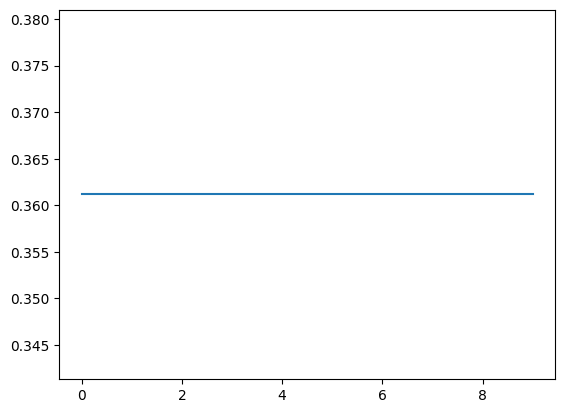

In [99]:
plt.plot(ss)

In [100]:
print(silhouette_score(data3[0], dbscan.labels_))
print(calinski_harabasz_score(data3[0], dbscan.labels_))
print(rand_score(dbscan.labels_, data3[1]))
print(fowlkes_mallows_score(dbscan.labels_, data3[1]))

0.36115325418020305
1.6281311977327493
0.49812048192771086
0.6972587946257433


In [101]:
ap = AffinityPropagation(preference=-55).fit(data3[0])

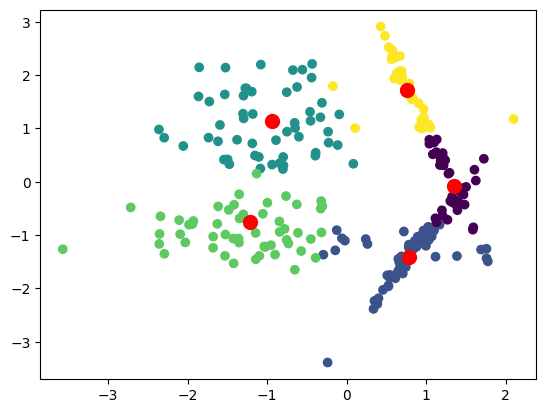

In [102]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=ap.labels_)
plt.scatter(ap.cluster_centers_[:,0], ap.cluster_centers_[:,1], s=100, c='red')

In [103]:
ss = []
for i in range(-65, -35):
    ss.append(silhouette_score(data3[0], AffinityPropagation(preference=i).fit(data3[0]).labels_))

/home/todarenko.03/.local/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/todarenko.03/.local/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/todarenko.03/.local/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/todarenko.03/.local/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/todarenko.03/.local/lib/python3.11/site-pa

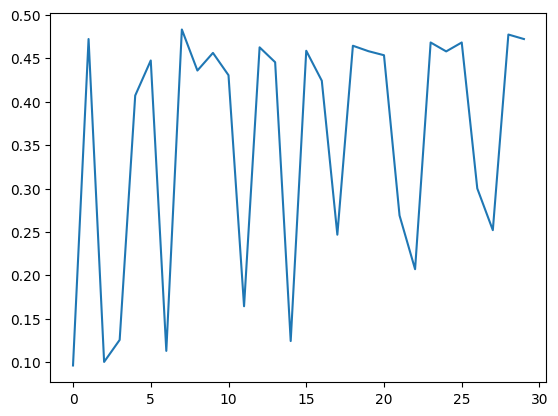

In [104]:
plt.plot(ss)

In [105]:
print(silhouette_score(data3[0], ap.labels_))
print(calinski_harabasz_score(data3[0], ap.labels_))
print(rand_score(ap.labels_, data3[1]))
print(fowlkes_mallows_score(ap.labels_, data3[1]))

0.461622461854073
313.0962761077344
0.642441767068273
0.5402295745933702


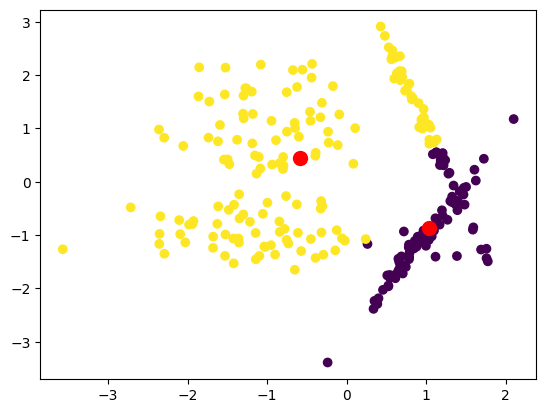

In [106]:
gm = GaussianMixture(n_components=2).fit(data3[0])
plt.scatter(data3[0][:,0], data3[0][:,1], c=gm.predict(data3[0]))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

In [107]:
print(silhouette_score(data3[0], gm.predict(data3[0])))
print(calinski_harabasz_score(data3[0], gm.predict(data3[0])))
print(rand_score(gm.predict(data3[0]), data3[1]))
print(fowlkes_mallows_score(gm.predict(data3[0]), data3[1]))

0.3563426891104585
137.73175733763387
0.5659759036144578
0.5767627188778324


In [108]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data3[0], GaussianMixture(n_components=i).fit(data3[0]).predict(data3[0])))

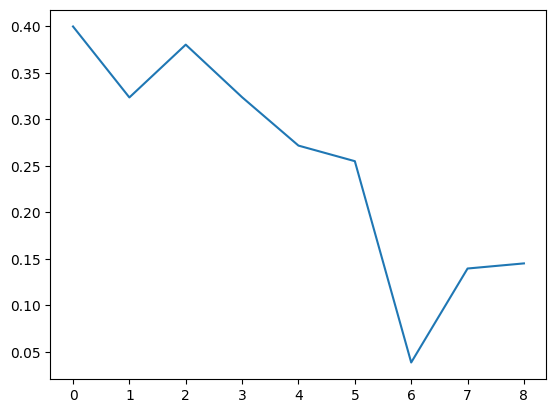

In [109]:
plt.plot(ss)

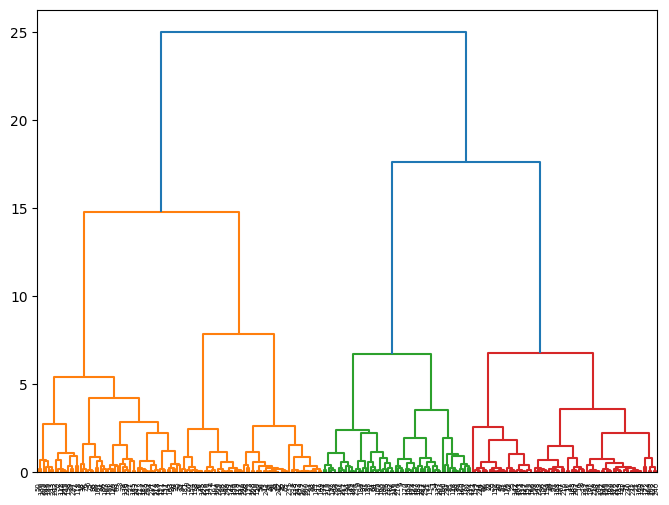

In [110]:
clusters = hierarchy.linkage(data3[0], method='ward')

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

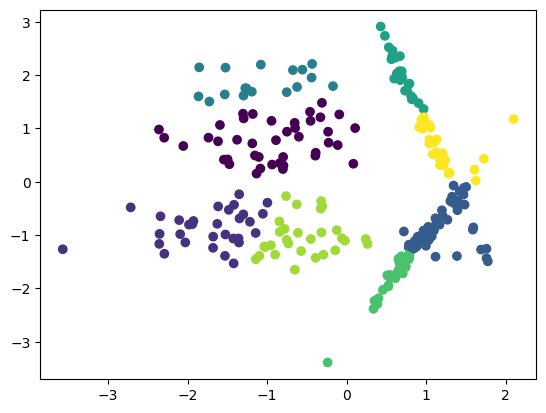

In [111]:
clustering = AgglomerativeClustering(n_clusters=8, linkage='ward').fit(data3[0])
plt.scatter(data3[0][:,0], data3[0][:,1], c=clustering.labels_)

In [112]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(data3[0], AgglomerativeClustering(n_clusters=i, linkage='ward').fit(data3[0]).labels_))

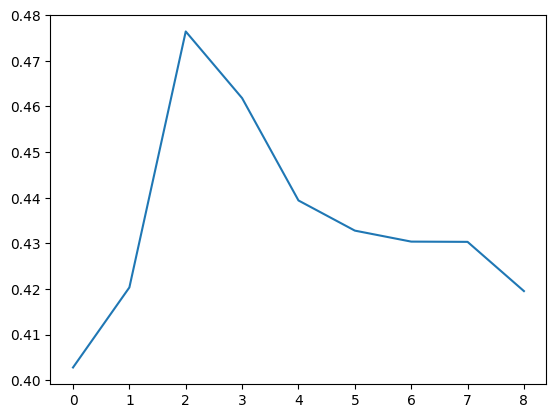

In [113]:
plt.plot(ss)

In [114]:
print(silhouette_score(data3[0], clustering.labels_))
print(calinski_harabasz_score(data3[0], clustering.labels_))
print(rand_score(clustering.labels_, data3[1]))
print(fowlkes_mallows_score(clustering.labels_, data3[1]))

0.43037312959078927
315.31906322148575
0.5934779116465864
0.4362350664983545


In [115]:
som = SOM(m=3, n=1, dim=2)
som.fit(data3[0])

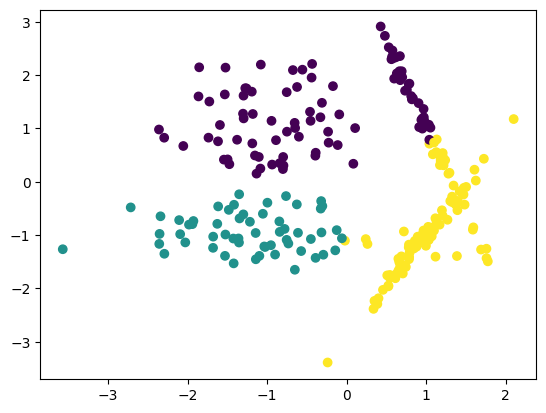

In [116]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=som.predict(data3[0]))

In [117]:
ss = []
for i in range(2, 11):
    som_ = SOM(m=i, n=1, dim=2)
    som_.fit(data3[0])
    ss.append(silhouette_score(data3[0], som_.predict(data3[0])))

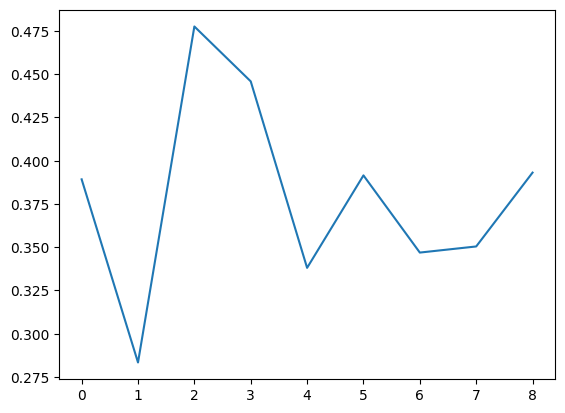

In [118]:
plt.plot(ss)

In [119]:
print(silhouette_score(data3[0], som.predict(data3[0])))
print(calinski_harabasz_score(data3[0], som.predict(data3[0])))
print(rand_score(som.predict(data3[0]), data3[1]))
print(fowlkes_mallows_score(som.predict(data3[0]), data3[1]))

0.4412915507180751
232.39341209506614
0.7034859437751004
0.659919199164957


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score, fowlkes_mallows_score 
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from sklearn_som.som import SOM

In [2]:
data1 = make_blobs(n_samples=200, n_features=2, centers=3)
data2 = make_blobs(n_samples=300, n_features=2, centers=5)
data3 = make_classification(n_samples=250, n_features=2, n_classes=2, n_redundant=0)

In [45]:
import sys
sys.path.insert(1, '..')
from models.KMeans import KMeans

In [46]:
kmeans = KMeans(centers=2)
kmeans.fit(data1[0])

[array([0.98668049, 5.52939099]), array([-6.74539381, -6.85144337])]


TypeError: list indices must be integers or slices, not tuple

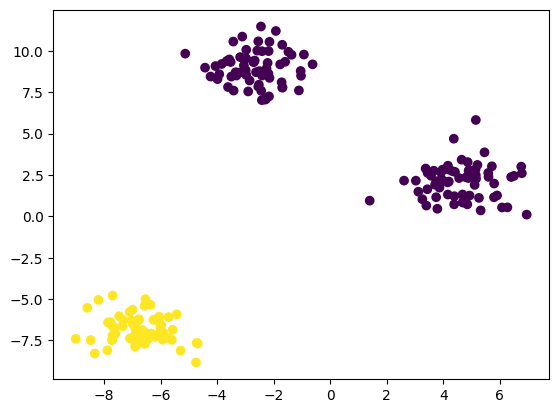

In [53]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=kmeans.predict(data1[0]))
print(kmeans.centroids)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], s=100, c='red')

In [24]:
print(silhouette_score(data1[0], kmeans.predict(data1[0])))
print(calinski_harabasz_score(data1[0], kmeans.predict(data1[0])))

0.556282585254448
231.4776440711291


In [19]:
kmeans = KMeans(centers=3)
kmeans.fit(data2[0])

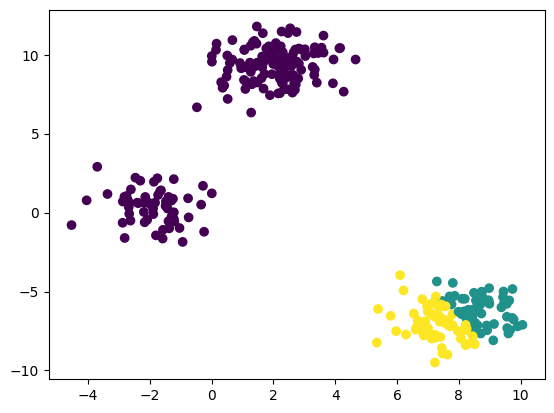

In [20]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=kmeans.predict(data2[0]))

In [21]:
print(silhouette_score(data2[0], kmeans.predict(data2[0])))
print(calinski_harabasz_score(data2[0], kmeans.predict(data2[0])))

0.49660065357388494
541.9628228605849


In [54]:
kmeans = KMeans()
kmeans.fit(data3[0])

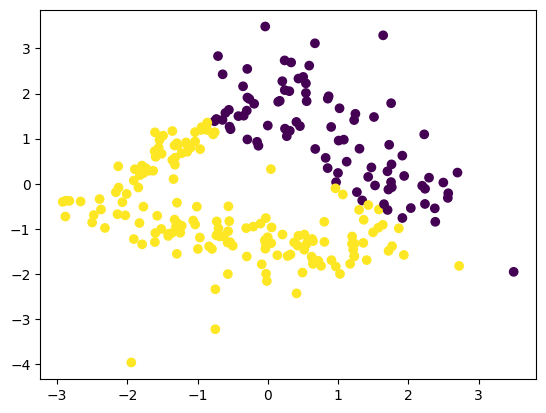

In [55]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=kmeans.predict(data3[0]))

In [17]:
print(silhouette_score(data3[0], kmeans.predict(data3[0])))
print(calinski_harabasz_score(data3[0], kmeans.predict(data3[0])))
print(rand_score(kmeans.predict(data3[0]), data3[1]))
print(fowlkes_mallows_score(kmeans.predict(data3[0]), data3[1]))

0.40977683643665175
182.18278930223204
0.7640481927710844
0.769629066890037
